<h3>In the name of Allah</h3>

<h3>Dataset Description</h3>

**penguins_size.csv**: Simplified data from original penguin data sets. Contains variables:

`species`: penguin species (Chinstrap, Adelie, or Gentoo)

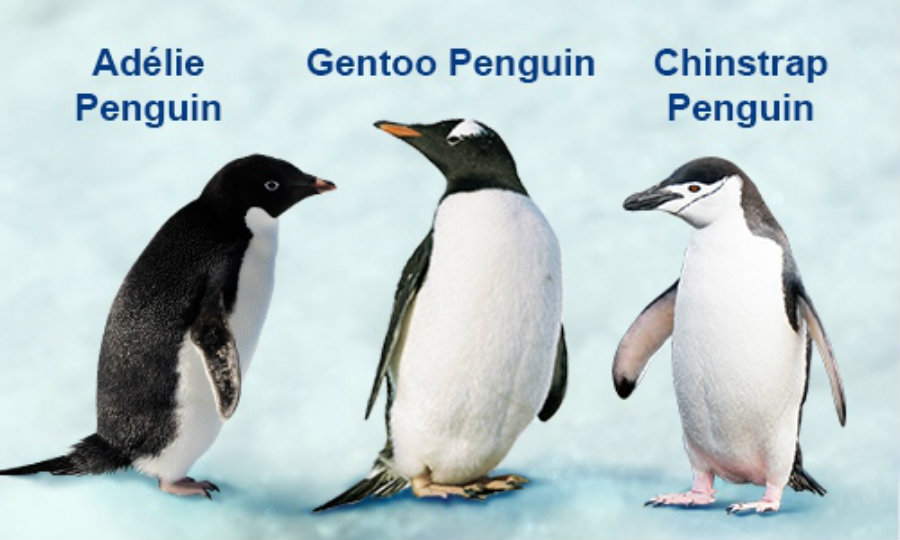

`culmen_length_mm`: culmen length (mm) -> Culmen length refers to the measurement of the upper ridge of a penguin's beak, from the tip to the point where it meets the forehead. This measurement is often used by researchers to study and differentiate between different species of penguins.

`culmen_depth_mm`: culmen depth (mm) -> Culmen depth refers to the measurement of the depth of the upper part of a penguin's beak, known as the culmen. This measurement is often used in studies of penguin biology and ecology to understand differences in beak morphology among different penguin species and how it relates to their feeding habits and ecological niches. For example, penguins with deeper culmen depths may be specialized for hunting certain types of prey or foraging in specific environments.

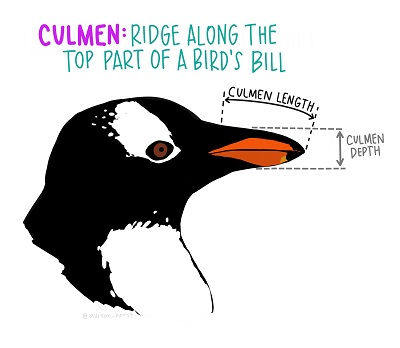

`flipper_length_mm`: flipper length (mm) -> Flipper length refers to the measurement of the length of a penguin's flippers, which are modified for swimming and diving. Penguins use their flippers to propel themselves through the water, and the length of their flippers can vary among different penguin species. The size and shape of a penguin's flippers are adapted to its specific swimming and diving needs, and they play a crucial role in the penguin's ability to navigate and catch prey in the ocean. Scientists often study flipper length to understand how different penguin species have evolved to thrive in their respective marine environments.

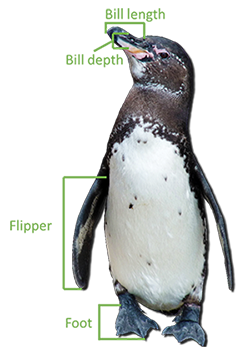

`body_mass_g`: body mass (g)

`island`: island name (Dream, Torgersen, or Biscoe) in the Palmer
Archipelago (Antractica)

`sex`: penguin sex

Side notes : There are 17 penguin species on the planet, but the eight most iconic reside in Antractica,
its nearby islands, and the sub-Antractic archipelagos of South Georgia and the Falklands.

===============================================================================================================================

In the first step, we import the relevant tools and packages (_Numpy_, _Pandas_ and _Matplotlib_):

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**1. Read dataset**

In [ ]:
penguin_df = pd.read_csv('penguins_size.csv')
penguin_df.tail(10)

At the end of the dataset there is a row that contains a **dot**. This value is invalid, so it is better to check all the columns containing the object to make sure there are valid values

In [ ]:
print(pd.unique(penguin_df['species']))
print(pd.unique(penguin_df['island']))
print(pd.unique(penguin_df['sex']))

The columns that contain object are listed above. As you can see, there is an invalid value (dot) in the `sex` column only, which should be replaced by the value of _NaN_.

Replacing invalid values with _NaN_

In [ ]:
sex_valid_values = ['FEMALE', 'MALE']
penguin_df.loc[~penguin_df['sex'].isin(sex_valid_values), 'sex'] = np.nan
penguin_df.tail(10)

In [ ]:
print(pd.unique(penguin_df['species']))
print(pd.unique(penguin_df['island']))
print(pd.unique(penguin_df['sex']))

There are now no invalid values in the `sex` column (Except _NaN_)

Converting the `object` to `category` so that the dataset occupies less memory

In [ ]:
penguin_df[['species','island','sex']] = penguin_df[['species','island','sex']].astype('category')
penguin_df.dtypes

**2. Find out shape of data**

In [ ]:
n_rows, n_cols = penguin_df.shape
print(f'Number of records is {n_rows}, and the number of columns is {n_cols}.')

The existing dataset contains 344 rows and 7 columns. Column titles are also given in the `dataset description` section.

**3. Dataset info**

In [ ]:
penguin_df.info()

Except for `species` and `island` columns, other columns contain _NaN_ values. The highest missing value also belongs to the `sex` column.

In [ ]:
penguin_df_des = penguin_df.describe() # Nan values ignored.
print(penguin_df.skew(numeric_only=True))
penguin_df_des

The mean and median values in all the columns are close to each other, also, the skewness value is small and close to zero so it can be concluded that the data distribution is probably symmetrical. Although it is better to check the data distribution by the corresponding graphs such as histogram. It can also be said about this dataset that 50% of penguins have the same weight as human babies.

**4. Unique Species**

In [ ]:
penguin_df['species'].unique()

Therefore, as mentioned in the _data description_ section, the dataset contains three species of penguins.

**5. Find NaN values per columns**

Checking each column for the presence or absence of missing value

In [ ]:
penguin_df.isnull().any()

As mentioned before, only the `species` and `island` columns do not have missing values and the rest of the columns contain these values.

The number of missing values in each column:

In [ ]:
penguin_df.isnull().sum()

Most of the missing values are related to `sex` column.

All the rows that contain missing value are shown below:

In [ ]:
# Method 1:
# nan_indices = np.unique(np.where(penguin_df.isnull())[0])
# penguin_df.iloc[nan_indices,:]

# Method 2:
nan_mask = penguin_df.isnull().any(axis=1)
penguin_df[nan_mask]

Because missing values make up less than 3% of the data, and on the other hand, logical values cannot be replaced, so it is better to ignore them.

In [ ]:
penguin_df = penguin_df.dropna()
penguin_df.tail(10)

Now the dataset is cleared of all missing values.

**6. Find culmen_depth_mm in each island**

Values of `culmen_depth_mm` for each island

In [ ]:
for (island_name, culmen_depth_vals) in penguin_df.groupby('island')['culmen_depth_mm']:
    print(f'{island_name}\n{culmen_depth_vals.head()}\n')

Data are shown in summary for each island.

In [ ]:
penguin_df.groupby('island',as_index=False).agg({'culmen_depth_mm':{'min','max','std','mean','median'}})

The lower average value and higher standard deviation value for `Biscoe` Island compared to other islands can indicate the presence of very different types of penguins that live on this island.
Because the `culmen depth` somehow distinguishes the types of penguins from each other.
On the other hand, the minimum value indicates that a type of penguin lives in `Biscoe` Island, which has the lowest `culmen depth` value compared to other penguins in the dataset. In other islands, less difference between `culmen depth` of penguins is observed. In other words, by comparing the statistical parameters calculated for `Dream` and `Torgersen` islands, a smaller difference is observed than the statistical parameters calculated for `Biscoe` Island.

In [ ]:
penguin_df.groupby(['island','species']).agg({'culmen_depth_mm':'mean'})

According to the tables, the penguins with the lowest `culmen depth` live only on `Biscoe` island. This type of penguin is called Gentoo.
In addition, there is a slight difference between the `culmen depth` for `Adelie` and `Chinstrap` penguins living on `Dream` Island.
Only one type of penguin (`Adelie`) lives in `Torgersen` Island, and therefore the closeness of the average value of `culmen depth` in these islands (i.e. `Dream` and `Torgersen`), which was discussed in the previous section, it is due to the presence of penguins for which the value of this parameter is very close to each other.

It should be noted that there is no island that has all three types of penguins.

**7. body mass in each sex**

In [ ]:
for (sex, body_mass_vals) in penguin_df.groupby('sex')['body_mass_g']:
    print(f'{sex}\n{body_mass_vals.head()}\n')

Data are shown in summary for each sex.

In [ ]:
penguin_df.groupby('sex',as_index=False)\
    .agg({'body_mass_g':{'min','max','std','mean','median'}})

In [ ]:
penguin_df.groupby(['sex','species'],as_index=False)['body_mass_g'].describe()

The above results indicate that the `body mass` of male penguins is higher than that of female penguins.
In fact, in all different species of penguins, the `body mass` of male penguins is higher.

It is interesting to note that the ratio of the average `body mass` of male penguins to the average `body mass` of female penguins is the same in different species and it has a value between **1.1** and **1.2**. In other words, the average weight of male penguins in one type is between 10% and 20% higher than the average weight of female penguins in the corresponding type.

It should be noted that the highest body mass in both males and females belongs to the `Gentoo` penguin. Among male penguins, `Chinstrap` penguins and among female penguins, `Adelie` penguins have the lowest body mass.


**8. species in each island**

In [ ]:
for (island, species) in penguin_df.groupby('island')['species']:
    print(f'{island}\n{species.head()}\n')

Data are shown in summary for each island.

In [ ]:
n_penguins_df = penguin_df.groupby(['island', 'species'], as_index=False)\
    .size().rename(columns={'size':'no. penguins'})
n_penguins_df

As it is obvious from the above table, most of the penguins live on `Biscoe` Island. This island has two types of penguins named Adelie and Gentoo. Another point is that the number of Adelie penguins is totally more than other penguins in the dataset.
There are only two types of penguins in `Dream` Island, Adelie and Chinstrap. In fact, both Gentoo and Chinstrap penguins are found only on `Biscoe` and `Dream` islands respectively.
`Torgersen` Island is the only island where one type of penguin lives, it also has the lowest number of penguins compared to other islands. The Adelie penguin species is the only penguin in the dataset that can be found on all three islands.

**9. share of female penguins in each species**

In [ ]:
sex_species_df = penguin_df.groupby(['species','sex'],as_index=False).size()
female_species = sex_species_df[sex_species_df['sex'] == 'FEMALE'].set_index('species')
total_pop = penguin_df['species'].value_counts()
female_species.assign(female_percent = (female_species['size'] / total_pop)*100)

As can be seen in the above table, the percentage of female penguins in each type is almost equal to 50%. Therefore, it can be said that 50% of the whole datasets are male penguins and the rest are female penguins.

In [ ]:
penguin_df.groupby(['island','species','sex'],as_index=False).size()

The above result shows that the number of male and female penguins of different types in each island is almost equal to each other. Therefore, it can be said that the percentage of male and female penguins of different types in the three mentioned islands is almost equal to 50%.

**10. flipper_length_mm comparisons between species ( min, max, mean )**

In [ ]:
penguin_df.groupby(['species'])['flipper_length_mm'].describe()

According to the data extracted from the mentioned parameter, it can be said that *Gentoo* penguins have the largest flipper length on average, and the value of this parameter varies between 203 and 231 mm.
In addition, *Adelie* penguins have the smallest flipper length on average, which is between 172 and 210 mm.

In [ ]:
penguin_df.groupby(['species','sex'])['flipper_length_mm'].describe()

According to the results shown in the above table, it can be mentioned that flipper length in male penguins is more than female penguins. In addition, the mean and median values show almost the same numbers, which probably indicates the symmetrical distribution of flipper length data in male and female penguins. 

<font color='yellow'>**EXTRA ANALYSIS ON THE DATASET**</font>

**1. The percentage of each type of penguin in the dataset**

In [ ]:
penguin_counts = penguin_df['species'].value_counts()
total_pop = np.sum(penguin_counts.values)
labels = [f'{key.title()}({value /total_pop *100:.2f}%)'
                for key, value in zip(penguin_counts.keys(), penguin_counts.values)]

plt.figure()
plt.pie(penguin_counts.values, labels=labels,
        explode=[0.05, 0, 0]);

In this graph, it can be seen that the data related to Chinstrap penguins have a lower percentage than other types of penguins in the dataset, and most of the dataset contains data related to Adelie and Gentoo penguins.

**2. Is there a relationship between the `body mass` and the `flipper length`?**

In [ ]:
plt.figure()
plt.plot(penguin_df['body_mass_g'], penguin_df['flipper_length_mm'], 'go')
R = np.corrcoef(penguin_df['body_mass_g'],
                penguin_df['flipper_length_mm'])[0, 1]
plt.title(f'R_pearson = {R:.4f}');
plt.xlabel('Body mass (g)');
plt.ylabel('Flipper length (mm)');

According to the diagram and Pearson's correlation coefficient (R), it is possible to understand the direct and strong relationship between `body mass` and `flipper length`.
In fact, with the increase in the penguin's `body mass`, it is expected that the `flipper length` will also increase.

**3. Is there any relation between `culmen length` and `culmen depth` parameters?**

In [ ]:
plt.figure()
plt.plot(penguin_df['culmen_length_mm'],penguin_df['culmen_depth_mm'],'bs')
R = np.corrcoef(penguin_df['culmen_length_mm'], penguin_df['culmen_depth_mm'])[0, 1]
plt.title(f'R_pearson = {R:.4f}');
plt.xlabel('Culmen length (mm)');
plt.ylabel('Culmen depth (mm)');

As it is clear from the graph and the Pearson correlation coefficient (R) value, there is a relatively weak relationship between these two parameters.
In addition, the Pearson correlation coefficient considers these two parameters to be inverse of each other. In other words, as one parameter increases, another parameter decreases.

**4. Find the characteristics of the penguin with the highest `flipper length` and `body mass`**

In [ ]:
penguin_df.nlargest(3, columns=['flipper_length_mm','body_mass_g'])

According to the above table, it can be seen that the largest amount of flipper length and body mass belong to the Gentoo penguins that live in Biscoe Island. Therefore, the body mass and flipper length of this type of penguin can reach more than 6 kg and about 230 mm, respectively.

**5. Is there a relationship between `culmen length` and `flipper length`?**

In [ ]:
plt.figure()
plt.plot(penguin_df['culmen_length_mm'],penguin_df['flipper_length_mm'],'r+')
R = np.corrcoef(penguin_df['culmen_length_mm'], penguin_df['flipper_length_mm'])[0, 1]
plt.title(f'R_pearson = {R:.4f}');
plt.xlabel('Culmen length (mm)');
plt.ylabel('Flipper length (mm)');

The above graph as well as the Pearson correlation coefficient show that there is a relatively strong relationship between Culmen length and Flipper length parameters. In fact, this relationship is direct.